In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from library.sb_utils import save_file

In [2]:
data = pd.read_csv('student-mat.csv')
#data = data.reset_index()
data = data.rename(columns = {'G1': 'first_period_grade', 'G2': 'second_period_grade', 'G3': 'final_grade'})
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   school               395 non-null    object
 1   sex                  395 non-null    object
 2   age                  395 non-null    int64 
 3   address              395 non-null    object
 4   famsize              395 non-null    object
 5   Pstatus              395 non-null    object
 6   Medu                 395 non-null    int64 
 7   Fedu                 395 non-null    int64 
 8   Mjob                 395 non-null    object
 9   Fjob                 395 non-null    object
 10  reason               395 non-null    object
 11  guardian             395 non-null    object
 12  traveltime           395 non-null    int64 
 13  studytime            395 non-null    int64 
 14  failures             395 non-null    int64 
 15  schoolsup            395 non-null    object
 16  famsup  

In [3]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
unnecessary_cols = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime']
data = data.drop(columns=unnecessary_cols)

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   studytime            395 non-null    int64 
 1   failures             395 non-null    int64 
 2   schoolsup            395 non-null    object
 3   famsup               395 non-null    object
 4   paid                 395 non-null    object
 5   activities           395 non-null    object
 6   nursery              395 non-null    object
 7   higher               395 non-null    object
 8   internet             395 non-null    object
 9   romantic             395 non-null    object
 10  famrel               395 non-null    int64 
 11  freetime             395 non-null    int64 
 12  goout                395 non-null    int64 
 13  Dalc                 395 non-null    int64 
 14  Walc                 395 non-null    int64 
 15  health               395 non-null    int64 
 16  absences

In [6]:
data.head()

,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   studytime            395 non-null    int64 
 1   failures             395 non-null    int64 
 2   schoolsup            395 non-null    object
 3   famsup               395 non-null    object
 4   paid                 395 non-null    object
 5   activities           395 non-null    object
 6   nursery              395 non-null    object
 7   higher               395 non-null    object
 8   internet             395 non-null    object
 9   romantic             395 non-null    object
 10  famrel               395 non-null    int64 
 11  freetime             395 non-null    int64 
 12  goout                395 non-null    int64 
 13  Dalc                 395 non-null    int64 
 14  Walc                 395 non-null    int64 
 15  health               395 non-null    int64 
 16  absences

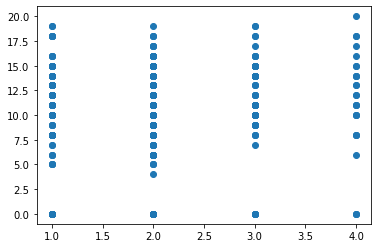

In [8]:
#correlation between studytime and final grade
plt.scatter(data['studytime'], data['final_grade'], alpha=1)
plt.show()

In [9]:
#group by average based on internet usage
#avg_by_internet = data['final_grade'].groupby(by=data['internet'])
avg_by_internet = data['final_grade'].groupby(by=data['internet']).mean()
print(avg_by_internet)

internet
no      9.409091
yes    10.617021
Name: final_grade, dtype: float64


In [10]:
#Convert yes and no to 1 and 0 in all columns
data_new = data
data_new = data_new.replace({'yes': 1, 'no': 0})
data_new.head()

,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,first_period_grade,second_period_grade,final_grade
0,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,6
1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,6
2,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,10
3,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,15
4,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,10


In [13]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   studytime            395 non-null    int64
 1   failures             395 non-null    int64
 2   schoolsup            395 non-null    int64
 3   famsup               395 non-null    int64
 4   paid                 395 non-null    int64
 5   activities           395 non-null    int64
 6   nursery              395 non-null    int64
 7   higher               395 non-null    int64
 8   internet             395 non-null    int64
 9   romantic             395 non-null    int64
 10  famrel               395 non-null    int64
 11  freetime             395 non-null    int64
 12  goout                395 non-null    int64
 13  Dalc                 395 non-null    int64
 14  Walc                 395 non-null    int64
 15  health               395 non-null    int64
 16  absences             395 n

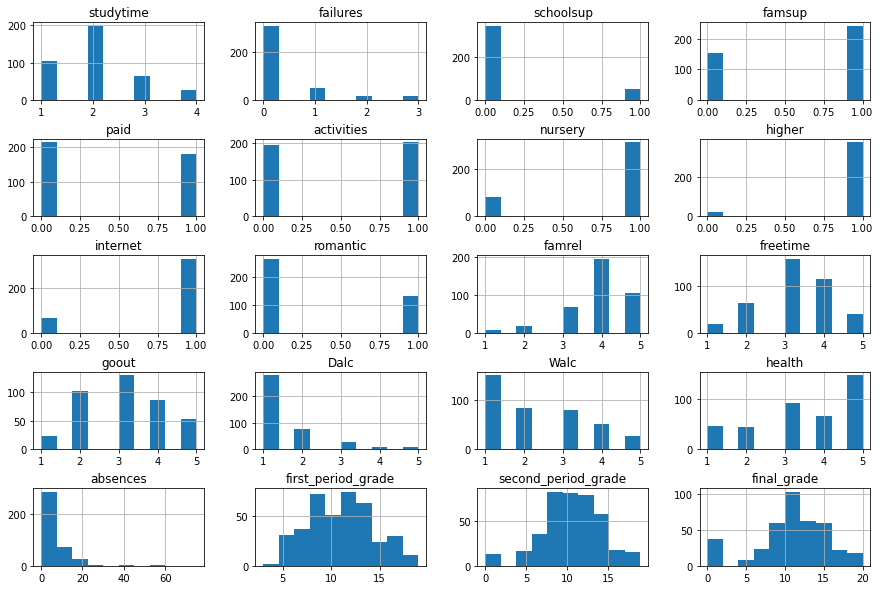

In [11]:
data_new.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

In [12]:
datapath = 'data'
save_file(data_new, 'student-mat_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "data/student-mat_cleaned.csv"
